## UFO Group Project

In [5]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

In [6]:
UFO = Table.read_table('scrubbed.csv')

### Time Analysis
Step 1 - Split the datetime column into the hour of day, month, and year as a list

Step 2 - Convert the strings into numbers

Step 3 - Convert the list into columns within a new table

Step 4 - Create histograms

In [4]:
#Here I split the datetime column into the hour, month, and year
UFOtimes = list(UFO.column('datetime'))
time = [i.split(' ', 1)[-1] for i in UFOtimes]
hour = [i.split(':', 1)[0] for i in time]
date = [i.split(' ', 1)[0] for i in UFOtimes]
month = [i.split('/', 1)[0] for i in date]
year = [i.split('/')[-1] for i in date]

In [5]:
timestable = Table().with_columns('hour', hour, 'month', month, 'year', year)

In [6]:
#Here I convert all of the strings into integers
Year = timestable.column('year').astype(np.int)
Hour = timestable.column('hour').astype(np.int)
Month = timestable.column('month').astype(np.int)
timestable.append_column('Year', Year)
timestable.append_column('Month', Month)
timestable.append_column('Hour', Hour)
timestable.drop('hour','month','year')

Year,Month,Hour
1949,10,20
1949,10,21
1955,10,17
1956,10,21
1960,10,20
1961,10,19
1965,10,21
1965,10,23
1966,10,20
1966,10,21


### Time Analysis - Month

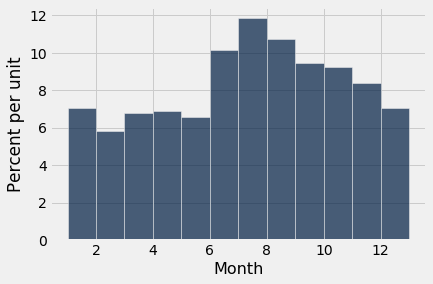

In [7]:
timestable.hist('Month', bins=np.arange(1,14,1))

Insights: Most sightings occur in July (12%). The least sightings occur in February (6%).

### Time Analysis - Hour

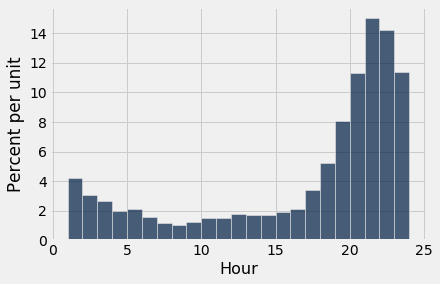

In [8]:
timestable.hist('Hour', bins=np.arange(1,25,1))

Insights: Most sightings occur in the evening. Specifically after 20:00, also known as 8PM.

### Time Analysis - Year

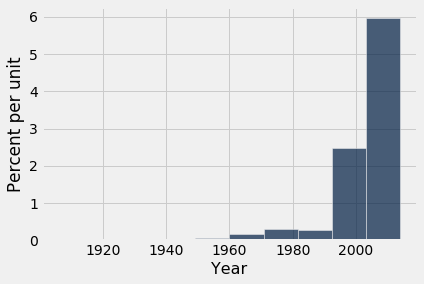

In [9]:
timestable.hist('Year')

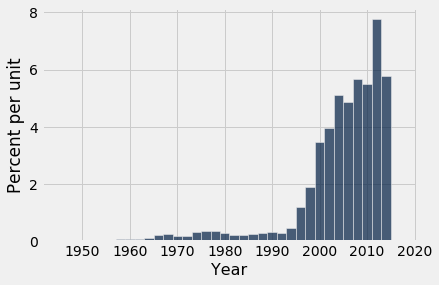

In [10]:
timestable.hist('Year', bins=np.arange(1945,2019,2))

In [11]:
timestable.group('Year').sort('count', descending = True)

Year,count
2012,7357
2013,7037
2011,5107
2008,4820
2009,4541
2010,4283
2007,4269
2004,4257
2005,4083
2003,3962


Insights: The most sightings happened in 2012. Coincidentally lining up with the end of the Mayan calendar? 

In [4]:
#Alice

shape_time = UFO.select('shape').append_column('Hour', Hour).pivot('shape', 'Hour')

NameError: name 'Hour' is not defined

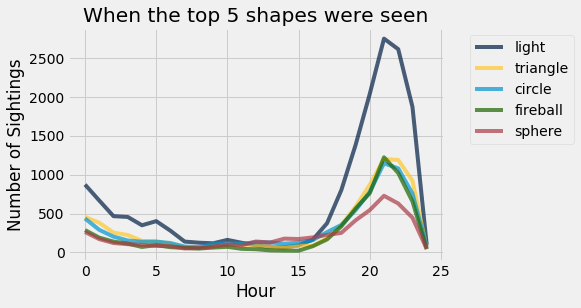

In [13]:
# Time of day and shape together
topshapes = shape_time.select('Hour','light', 'triangle', 'circle', 'fireball', 'sphere')
topshapes.plot('Hour')
plots.title('When the top 5 shapes were seen')
plots.ylabel('Number of Sightings')
plots.show()

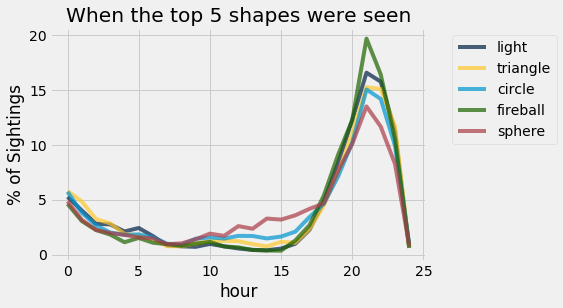

In [14]:
# Normalized
light = topshapes.column('light')/sum(topshapes.column('light'))*100
triangle = topshapes.column('triangle')/sum(topshapes.column('triangle'))*100
circle = topshapes.column('circle')/sum(topshapes.column('circle'))*100
fireball = topshapes.column('fireball')/sum(topshapes.column('fireball'))*100
sphere = topshapes.column('sphere')/sum(topshapes.column('sphere'))*100

scaled_topshapes = Table().with_columns('hour', topshapes.column('Hour'),
                                        'light', light,
                                        'triangle', triangle,
                                        'circle', circle,
                                        'fireball', fireball,
                                        'sphere', sphere)
scaled_topshapes.plot('hour')
plots.title('When the top 5 shapes were seen')
plots.ylabel('% of Sightings')
plots.show()

Mean,SD,2SD,z-score,p-value,95% CI,2012
4857.91,1163.53,7184.98,-2.14784,0.0158631,"[2577.0, 7138.0]",7357


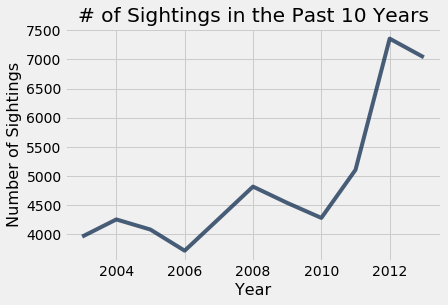

In [15]:
# Looking at the latest 10 years
tenyrs = timestable.group('Year').sort('Year', descending = True).where('Year', are.between(2003,2014))
avg = np.average(tenyrs.column('count'))
std = np.std(tenyrs.column('count'))
twostd = avg+(2*std)
zscore = (avg-7357)/(std)
CI = str([round(avg-1.96*std), round(avg+1.96*std)])

import scipy.stats as st
pvalue = st.norm.sf(abs(zscore))
pvalue

stat_table = Table().with_columns('Mean', avg,
                                 'SD', std,
                                 '2SD', twostd,
                                 'z-score', zscore,
                                 'p-value', pvalue,
                                 '95% CI', CI,
                                 '2012', 7357)
stat_table.show()
tenyrs.plot('Year')
plots.title('# of Sightings in the Past 10 Years')
plots.ylabel('Number of Sightings')
plots.show()

### Sighting Characteristics

In [16]:
# Reading in table
ufo = Table.read_table('scrubbed.csv')

datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 1949-50. It o ...,4/27/2004,29.8830556,-97.9411
10/10/1949 21:00,lackland afb,tx,nan,light,7200,1-2 hrs,"1949 Lackland AFB, TX. Lights racing across the sky ...",12/16/2005,29.38421,-98.5811
10/10/1955 17:00,chester (uk/england),nan,gb,circle,20,20 seconds,"Green/Orange circular disc over Chester, England",1/21/2008,53.2,-2.91667
10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving the only E ...,1/17/2004,28.9783333,-96.6458
10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/attack aircra ...,1/22/2004,21.4180556,-157.804
10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl with us now 5 ...,4/27/2007,36.5950000,-82.1889
10/10/1965 21:00,penarth (uk/wales),nan,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above me for 3 mi ...,2/14/2006,51.434722,-3.18
10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish color disk/sau ...,10/2/1999,41.1175000,-73.4083
10/10/1966 20:00,pell city,al,us,disk,180,3 minutes,"Strobe Lighted disk shape object observed close, at l ...",3/19/2009,33.5861111,-86.2861
10/10/1966 21:00,live oak,fl,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregnant mother ...,5/11/2005,30.2947222,-82.9842


In [17]:
# sighting duration
duration = ufo.column('duration (seconds)')
duration = np.char.strip(duration, chars='`')
duration = duration.astype(np.float)
ufo = ufo.drop('duration (seconds)')
ufo = ufo.with_columns('duration (seconds)', duration)

In [19]:
# Extracting only relevant information
c_table = Table().with_columns('Duration', duration, 'shape', ufo.column('shape'))
c2_table = c_table.select('Duration', 'shape')

Duration,shape
2700,cylinder
7200,light
20,circle
20,circle
900,light
300,sphere
180,circle
1200,disk
180,disk
120,disk


In [20]:
# Adding in buckets
c2_table = c2_table.sort('Duration')
l = ['10 and below'] * 13361 
l +=  ['Between 11 and 60'] * 16116 
l += ['Between 61 and 300'] * 23956
l += ['Between 301 and 1000'] * 13072
l += ['Greater than 1000'] * 13827
c2_table = c2_table.with_columns('Bucket', l)

Duration,shape,Bucket
0.001,flash,10 and below
0.01,fireball,10 and below
0.01,light,10 and below
0.01,unknown,10 and below
0.01,triangle,10 and below
0.01,triangle,10 and below
0.01,sphere,10 and below
0.02,fireball,10 and below
0.02,diamond,10 and below
0.05,circle,10 and below


In [22]:
# Grouping by bucket
c2_groups = c2_table.group('Bucket')

Bucket,count
10 and below,13361
Between 11 and 60,16116
Between 301 and 1000,13072
Between 61 and 300,23956
Greater than 1000,13827


Text(0.5, 1.0, 'UFO Sighting Duration Breakdown (seconds)')

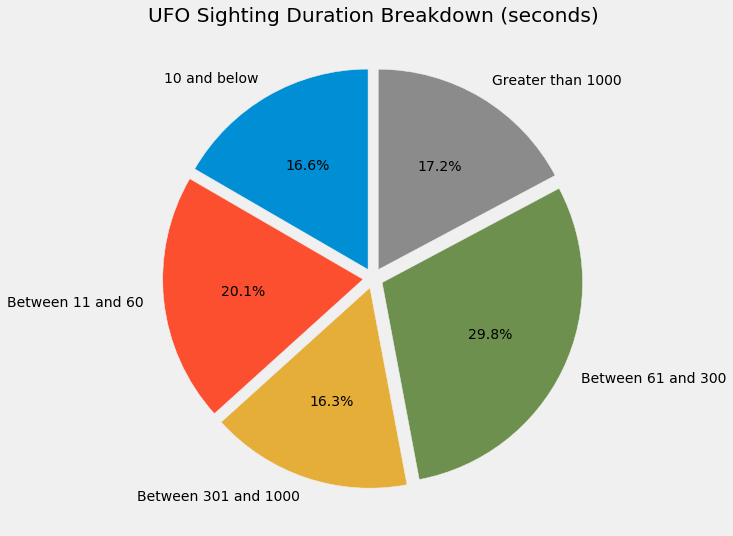

In [24]:
# Creating pie chart
explode = [0.05]*len(c2_groups.column('Bucket')) 
plots.figure(figsize=(8,12))
plots.pie(c2_groups.column('count'), labels=c2_groups.column('Bucket'), autopct='%1.1f%%', \
        explode=explode, startangle=90)
plots.title('UFO Sighting Duration Breakdown (seconds)')

In [25]:
# Selecting shapes and grouping negligible values into "other" group
s0_table = ufo.select('shape')
s_count = s0_table.group('shape')
s_count = s_count.sort('count', descending=True).remove(4).remove(4)
other = np.sum(s_count.take[7:len(s_count.column('shape'))].column('count'))
s_count = s_count.take[:7]
s_count = s_count.append(['other', other])

shape,count
light,16565
triangle,7865
circle,7608
fireball,6208
sphere,5387
disk,5213
oval,3733
other,16520


Text(0.5, 1.0, 'UFO Shape Breakdown')

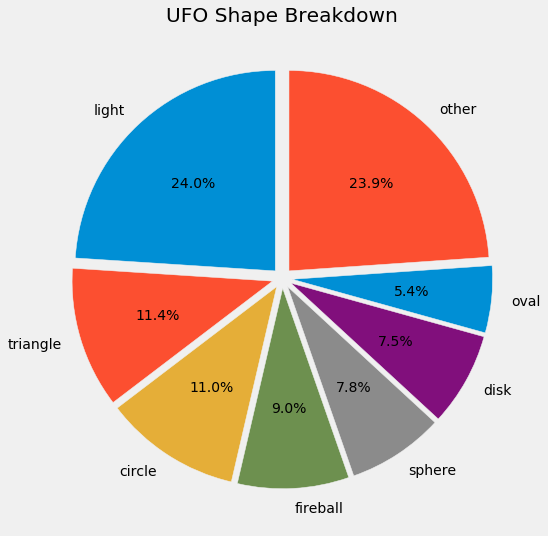

In [27]:
# Creating pie chart
explode = [0.05]*len(s_count.column('shape')) 
plots.figure(figsize=(8,12))
plots.pie(s_count.column('count'), labels=s_count.column('shape'), autopct='%1.1f%%', \
        explode=explode, startangle=90)
plots.title('UFO Shape Breakdown')

In [28]:
s0_table.group('shape')

shape,count
changed,1
changing,1962
chevron,952
cigar,2057
circle,7608
cone,316
crescent,2
cross,233
cylinder,1283
delta,7


### Spatial Patterns

In [29]:
ufo = Table.read_table('scrubbed.csv')
location = ufo.select("city", "state", "country")

In [30]:
# Extracting US sightings
us = location.where("country", are.equal_to("us"))

city,state,country
san marcos,tx,us
edna,tx,us
kaneohe,hi,us
bristol,tn,us
norwalk,ct,us
pell city,al,us
live oak,fl,us
hawthorne,ca,us
brevard,nc,us
bellmore,ny,us


In [31]:
states = us.group("state").exclude(7).exclude(38).with_column('states', np.arange(1,51))

In [32]:
populations = states.with_columns('Populations', 
                                  make_array(
                                      731545,
                                      4903185,
                                      3017804,
                                      7278717,
                                      39512223,
                                      5758736,
                                      3565287,
                                      973764,
                                      21477737,
                                      10617423,
                                      1415872,
                                      3155070,
                                      1787065,
                                      12671821,
                                      6732219,
                                      2913314,
                                      4467673,
                                      4648794,
                                      6892503,
                                      6045680,
                                      1344212,
                                      9986857,
                                      5639632,
                                      6137428,
                                      2976149,
                                      1068778,
                                      10488084,
                                      762062,
                                      1934408,
                                      1359711,
                                      8882190,
                                      2096829,
                                      3080156,
                                      19453561,
                                      11689100,
                                      3956971,
                                      4217737,
                                      12801989,
                                      1059361,
                                      5148714,
                                      884659,
                                      6829174,
                                      28995881,
                                      3205958,
                                      8535519,
                                      623989,
                                      7614893,
                                      5822434,
                                      1792147,
                                      578759))

In [33]:
# Normalizing to population
pc_array = populations.column('count') / populations.column('Populations') * 100000
percap = populations.with_columns('Population Per Capita', pc_array)

Text(0, 0.5, 'State')

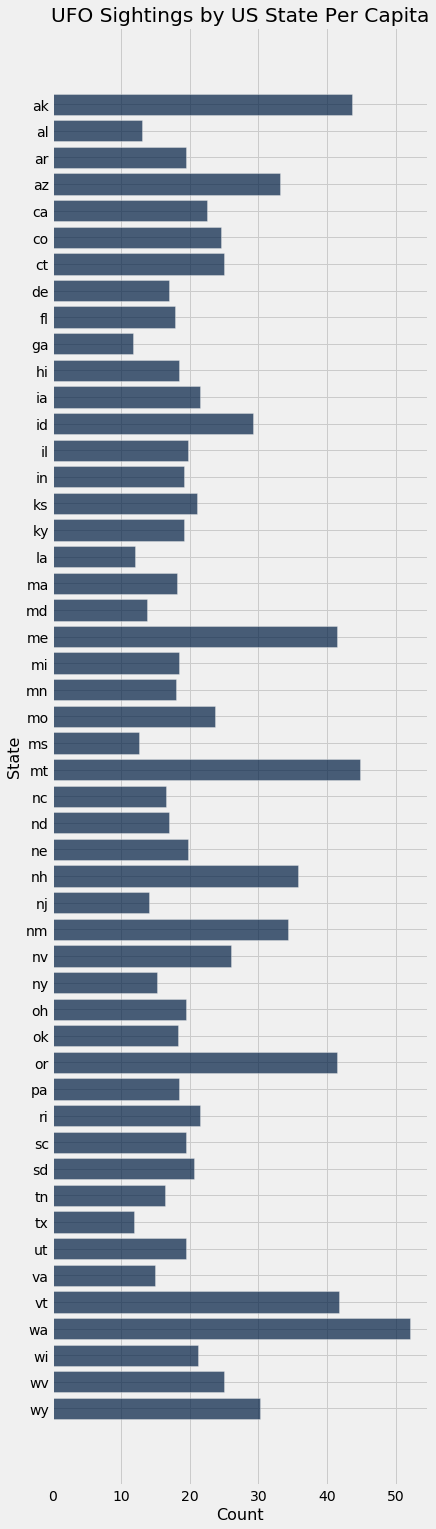

In [34]:
percap.barh('state', 'Population Per Capita')
plots.title("UFO Sightings by US State Per Capita")
plots.xlabel('Count')
plots.ylabel('State')

In [47]:
lower = percap.column('state')
upper = np.char.upper(lower)

In [50]:
percap2 = Table().with_columns('state', upper, 'count per cap', pc_array)

state,count per cap
AK,43.6063
AL,13.0935
AR,19.4844
AZ,33.1652
CA,22.555
CO,24.5366
CT,25.019
DE,17.0473
FL,17.8557
GA,11.8202


In [72]:
# Contructing heat map for better visualization
import plotly.express as px

fig = px.choropleth(locations=percap2.column('state'), locationmode="USA-states", \
                    color=percap2.column('count per cap'), scope="usa", \
                    color_continuous_scale="geyser", range_color=(10, 55))
fig.show()

In [77]:
comparison = percap.sort('Population Per Capita', descending = True).exclude(np.arange(5,45))
comp1 = comparison.exclude(np.arange(5, 10))
comp2 = comparison.exclude(np.arange(0, 5))

state,count,states,Populations,Population Per Capita
al,642,2,4903185,13.0935
ms,375,25,2976149,12.6002
la,558,18,4648794,12.0031
tx,3447,43,28995881,11.8879
ga,1255,10,10617423,11.8202


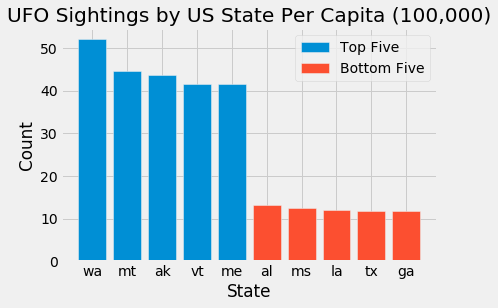

In [78]:
# Top five and lowest five states sightings per capita
plots.bar(comp1.column('state'), comp1.column('Population Per Capita'), label='Top Five')
plots.bar(comp2.column('state'), comp2.column('Population Per Capita'), label='Bottom Five')
plots.title("UFO Sightings by US State Per Capita (100,000)")
plots.xlabel('State')
plots.ylabel('Count')
plots.legend()

In [159]:
# Statistical analysis of Washington state's significance in UFO sightings 
percap.sort('count', descending=True)

state,count,states,Populations,Population Per Capita
ca,8912,5,39512223,22.555
wa,3966,47,7614893,52.0822
fl,3835,9,21477737,17.8557
tx,3447,43,28995881,11.8879
ny,2980,34,19453561,15.3185
il,2499,14,12671821,19.7209
az,2414,4,7278717,33.1652
pa,2366,38,12801989,18.4815
oh,2275,35,11689100,19.4626
mi,1836,22,9986857,18.3842


In [164]:
len(us.column('state'))

65114

In [172]:
us.group('state').sort('count', descending=True)

state,count
ca,8912
wa,3966
fl,3835
tx,3447
ny,2980
il,2499
az,2414
pa,2366
oh,2275
mi,1836


In [165]:
wash_pop = 7600000
us_pop = 328000000
n = 65114
p = wash_pop / us_pop
np.random.binomial(n, p)

1547

In [166]:
n*p

1508.739024390244

In [167]:
wash_count = 3966  # actual amount of sightings occuring in Washington state in the dataset

Text(0.5, 1.0, 'Binomial Distribution of Washington Counts')

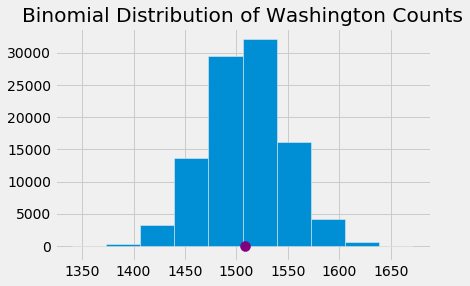

In [169]:
# Binomial distirbution simulation
nsim = 100000
plots.hist(np.random.binomial(n,p,nsim)) 
plots.scatter(n*p, -5, color='purple', s=100, zorder=2, label='Expected Value')
plots.title('Binomial Distribution of Washington Counts')


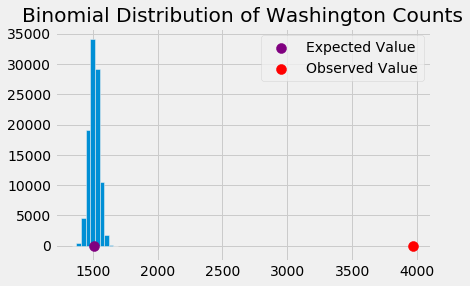

In [170]:
# Comparing above distribution to observed value
plots.hist(np.random.binomial(n,p,100000))
plots.scatter(n*p, -5, color='purple', s=100, zorder=2, label='Expected Value')
plots.scatter(wash_count, -5, color='red', s=100, zorder=2, label='Observed Value')
plots.title('Binomial Distribution of Washington Counts')
plots.legend()

*We can reject hypothesis that the amount of Washington sightings follows a binomial distribution*

